30/11/2020

DUBOIS Thomas

manipulation pandas, numpy et matplotlib

Utilisation seaborn et sklearn

Utilisation d'ACP et de classification : Random Forest, Kmean, Naive Bayes

# Introduction

Pour ce Notebook nous allons utiliser une jeu de données portant sur des vins avec un certain nombre de caractéristiques et une variable résultat : le type de vin (1,2,3).


Nous allons manipuler les données et en faire un premier bref déscriptif puis nous mettrons en place plusieurs méthodes de classification.

# Manipulation des données

In [155]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [157]:
df = pd.read_csv("data/wines.csv", sep=";")
df

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


Nous possédons un jeu de de 177 données de vins composé de 13 variables + la classe du vin :

In [159]:
list(df)

['Class',
 'Alcohol',
 'Malic_acid',
 'Ash',
 'Alcalinity_of_ash',
 'Magnesium',
 'Total_phenols',
 'Flavanoids',
 'Nonflavanoid_phenols',
 'Proanthocyanins',
 'Color_intensity',
 'Hue',
 'OD280_OD315_of_diluted_wines',
 'Proline']

In [160]:
for i in range(1,4):
    print('Nombre de lignes classe '+str(i)+' : '+str(len(df.loc[df['Class']==i])))

Nombre de lignes classe 1 : 59
Nombre de lignes classe 2 : 71
Nombre de lignes classe 3 : 48


In [161]:
df.isna().sum()

Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280_OD315_of_diluted_wines    0
Proline                         0
dtype: int64

Très bien, La dataFrame ne comporte pas de Nan.


In [162]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


On va utiliser pairplot pour afficher les variables les unes en fonction des autres :

On va essayer de voir les corrélations possibles entre certaines variables :

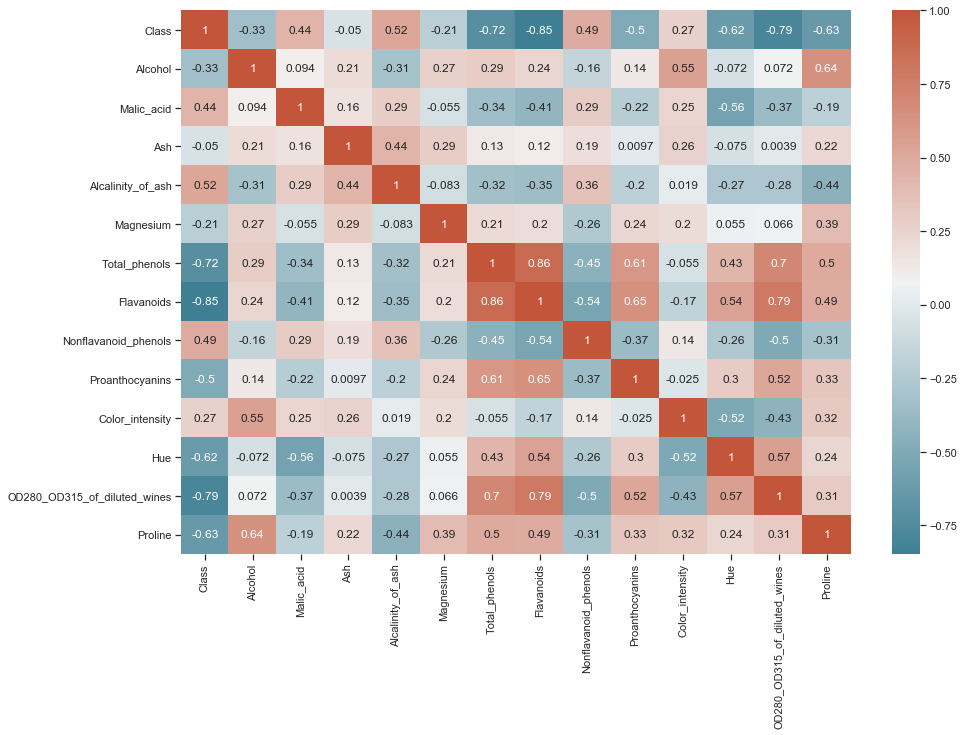

In [165]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

On voit qu'il ya certaines variables qui ont un impact fort sur les classes : l'absorbance OD280/OD315, les Flavanoïdes et les phénols.

Au contraire d'autre ont très peu d'impact : le taux de cendres principalement et le magnesium un petit peu.

Enfin on voit que les Flavanoïdes sont très corrélés à de nombreuses autres variables, tout comme les phénols et l'absorbance OD280/OD315.


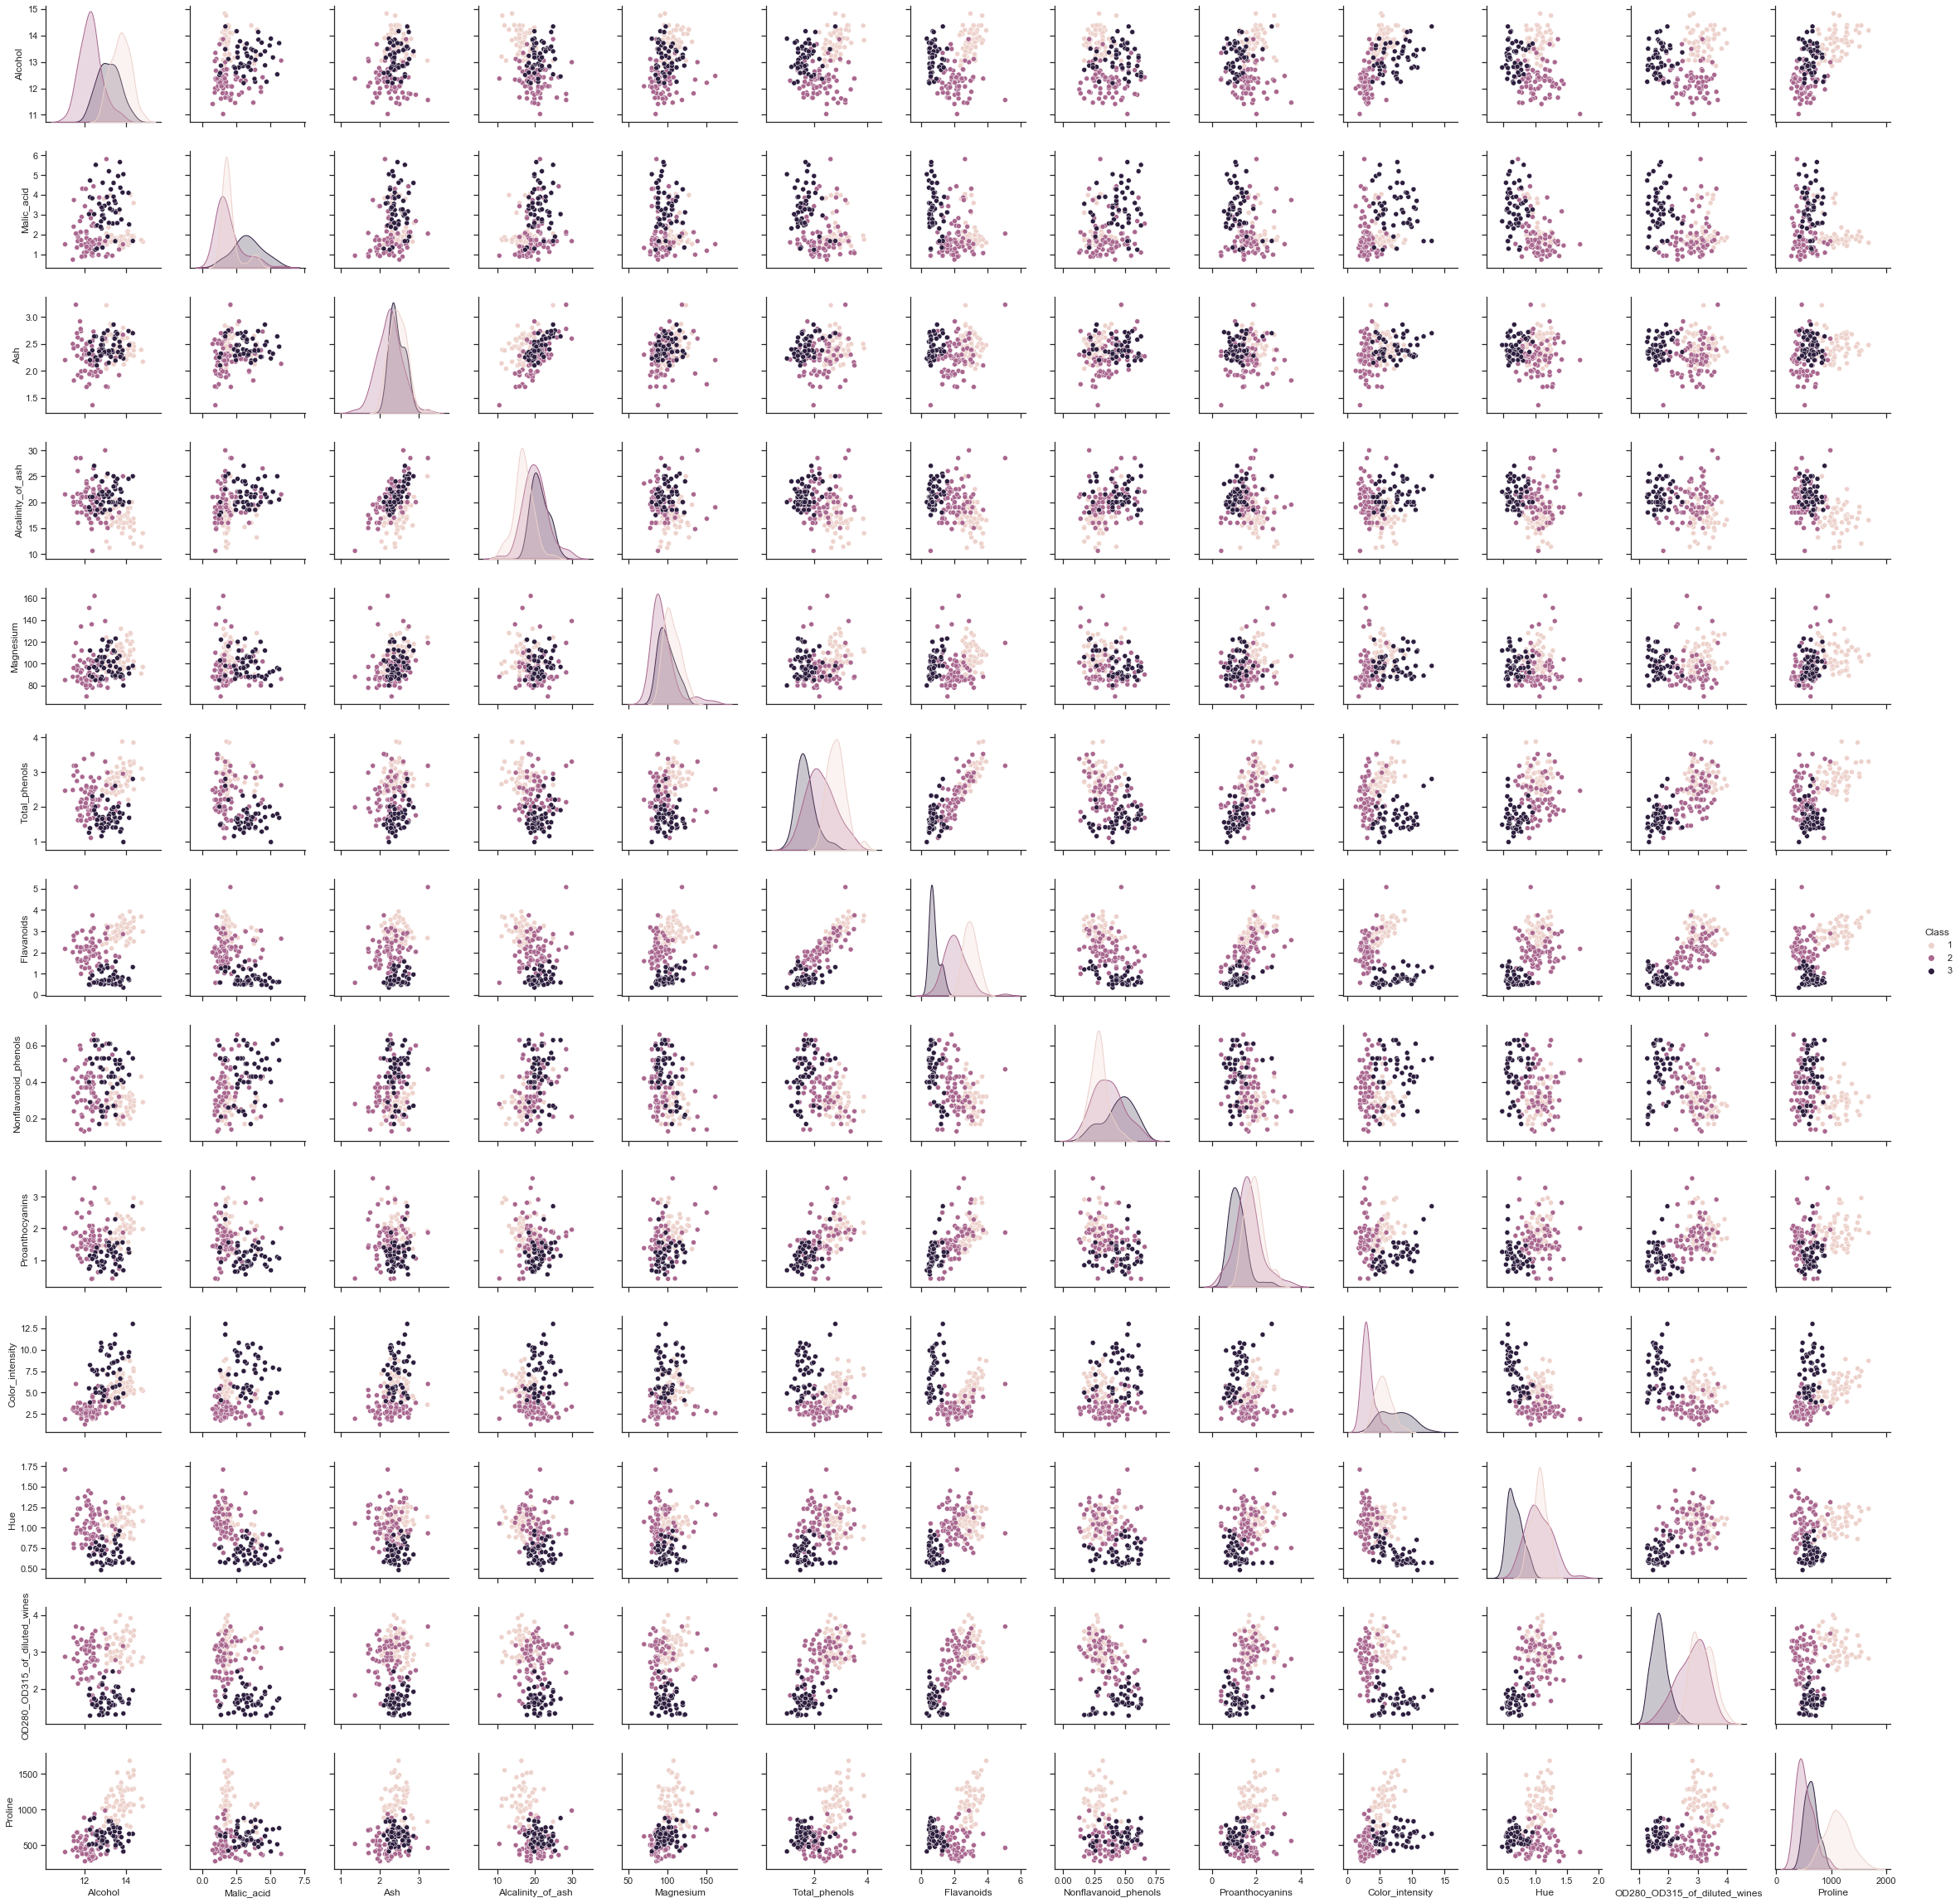

In [163]:
import seaborn as sns

sns.pairplot(df, hue='Class')

Forcement beaucoup de graphs... On remarque toutefois que  Proline permet de très bien différencier les trois classes !

De meme pour Flavanoide ! Mais bon, il va falloir essayer de gerer ca mieux



De ce que l'on viens de voir ci dessus, les variables Flavanoïdes, l'absorbance et les phénols ont l'air d'avoir le plus d'impact dans la classification.  Esseyons plusieurs résolutions :

In [167]:
df.isna().sum()

Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280_OD315_of_diluted_wines    0
Proline                         0
dtype: int64

[]

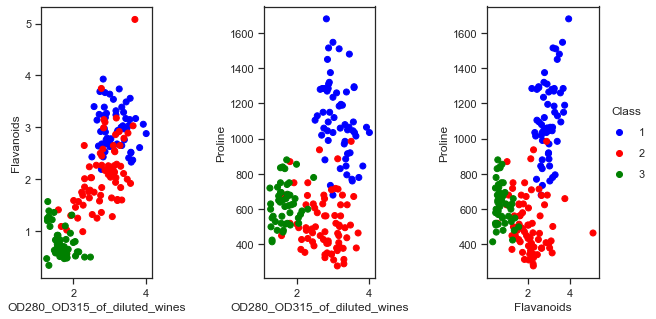

In [178]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=1, wspace=1)

color_list = ['blue', 'red', 'green']
colors = [color_list[c-1] for c in df['Class']]

# plot 1
ax1 = plt.subplot(1,3,1)

ax1.scatter(df['OD280_OD315_of_diluted_wines'], df['Flavanoids'], c=colors)
plt.xlabel('OD280_OD315_of_diluted_wines')
plt.ylabel('Flavanoids')

# plot 2
ax2 = plt.subplot(1,3,2)

ax2.scatter(df['OD280_OD315_of_diluted_wines'],df['Proline'], color=colors)
plt.xlabel('OD280_OD315_of_diluted_wines')
plt.ylabel('Proline')

# plot 3
ax3 = plt.subplot(1,3,3)

ax3.scatter(df['Flavanoids'],df['Proline'], color=colors)
plt.xlabel('Flavanoids')
plt.ylabel('Proline')

# legend
for ind, s in enumerate(df['Class'].unique()):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=color_list[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, 
           bbox_to_anchor=(1.5, 0.5) , loc="center right", title='Class')
plt.plot()

Comme on le voit ces critères permettent en effet plutot bien de séparer les différentes classes.

Le meilleur semble être celui du milieu (OD280_OD315_of_diluted_wines & Proline)

# ACP

On commence par standardiser les variables :

In [248]:
n = df.shape[0]
p = df.shape[1]-1
print(n,p)

178 13


In [249]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_standardise = sc.fit_transform(df[liste_df[1:]]) #on eneleve la variable reponse !
df_standardise

print(np.mean(df_standardise,axis=0)) #presque 0 car erreur de trancature
print(np.std(df_standardise,axis=0))  #1

[-8.38280756e-16 -1.19754394e-16 -8.37033314e-16 -3.99181312e-17
 -3.99181312e-17  0.00000000e+00 -3.99181312e-16  3.59263181e-16
 -1.19754394e-16  3.49283648e-17  1.99590656e-16  3.19345050e-16
 -1.59672525e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [250]:
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(df_standardise)
print(acp.n_components_)  #car on a tout gardé ici

13


In [251]:
eigval = (n-1)/n*acp.explained_variance_
print(eigval) #valeur corrigée

[4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]


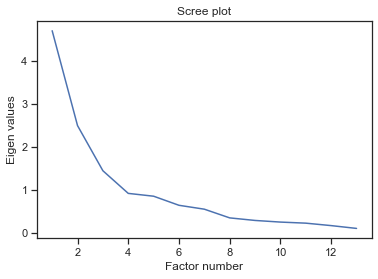

In [252]:
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Par la méthode du coude, on choisirait ici 3 composantes

In [253]:
print(acp.singular_values_**2/n) #ou valeurs singulieres

[4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]


In [254]:
prop_var = acp.explained_variance_ratio_ #proportion de variance expliquée
prop_var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [255]:
prop_var = np.cumsum(prop_var)
prop_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

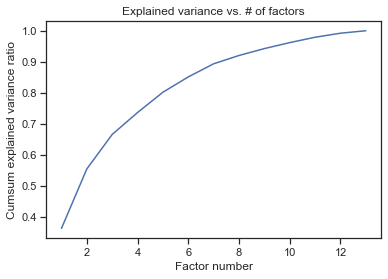

In [256]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),prop_var)
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

De même ici on chosiir 3-4 composantes.

In [257]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

    Val.Propre    Seuils
0     4.705850  3.180134
1     2.496974  2.180134
2     1.446072  1.680134
3     0.918974  1.346800
4     0.853228  1.096800
5     0.641657  0.896800
6     0.551028  0.730134
7     0.348497  0.587277
8     0.288880  0.462277
9     0.250902  0.351166
10    0.225789  0.251166
11    0.168770  0.160256
12    0.103378  0.076923


De part la règle de Kaiser, pour une ACP normée, la somme des valeurs propres étant égale au nombre de variables, leur moyenne vaut 1. On considère ainsi qu’un axe est intéressant si sa valeur propre est supérieure 1.

Ici on choisit encore 3 !

On peut décider d'afficher tous les individus selon le premier plan par exemple :

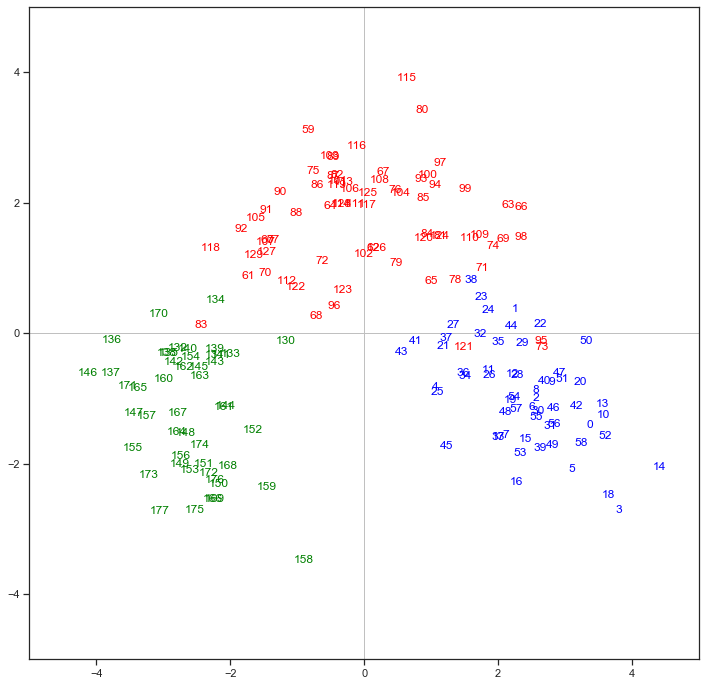

In [258]:
color_list = ['blue', 'red', 'green']
colors = [color_list[c-1] for c in df['Class']]
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-5,5) #même limites en abscisse
axes.set_ylim(-5,5) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
     plt.annotate(df.index[i],(coord[i,0],coord[i,1]),color=colors[i])
#ajouter les axes
plt.plot([-5,5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

Ou si l'on prefere avec des points :

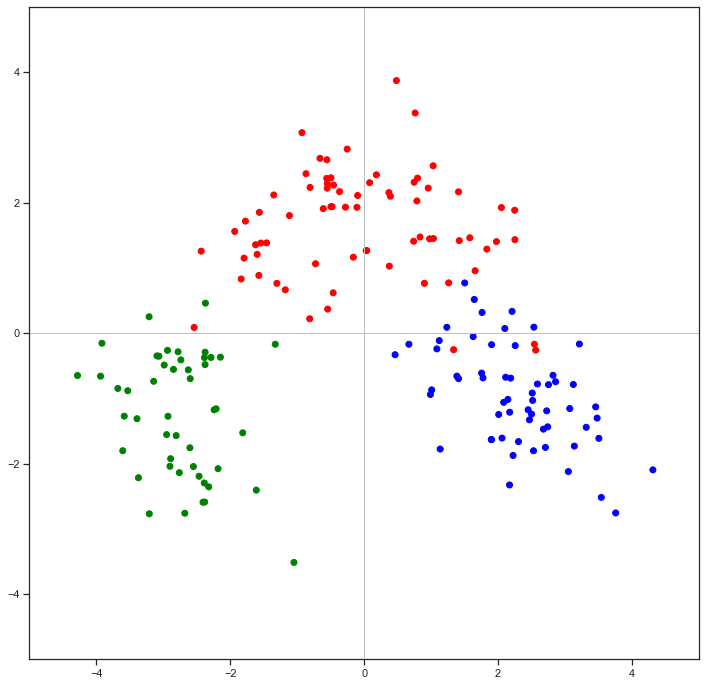

In [259]:
color_list = ['blue', 'red', 'green']
colors = [color_list[c-1] for c in df['Class']]
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-5,5) #même limites en abscisse
axes.set_ylim(-5,5) #et en ordonnée
#placement des étiquettes des observations
axes.scatter(coord[:,0], coord[:,1], c=colors)

#ajouter les axes
plt.plot([-5,5],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

On obtient une plutot bonne séparation ! On rappel ici qu'on a utilisé 3 axes et que on avait choisi 3 axes aux vus des différents tests.

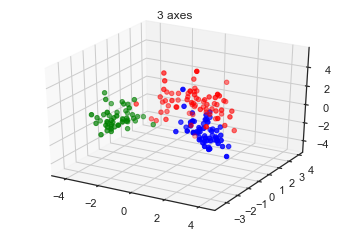

In [262]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coord[:,0], coord[:,1], coord[:,2], c=colors)
plt.title("3 axes")
plt.show()

Cela reste complexe à voir pour un nombre de composante >= 3

# Résolution par apprentisage validation :

On va commencer par faire une résolution sans utiliser l'ACP puis dans un deuxieme cas on utilisera les composantes données par l'ACP.

## Résolution par apprentisage validation en utilisant les variables du df

In [307]:
liste_df = list(df)

In [308]:
df1 = df[liste_df[1:]]
df1

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [271]:
target = df[liste_df[0]]

In [273]:
from sklearn.model_selection import train_test_split
# On coupe la data en 70% et 30%
data_test = train_test_split(df1, target
                                 , random_state=0
                                 , train_size=0.70)
#data_test est une liste de 4 DF :
data_train, data_test, target_train, target_test = data_test

## Naive Bayes

"modèle à caractéristiques statistiquement indépendantes " : créé donc des classes en partant du principe que chaque paramètre est indépendant

In [274]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(data_train, target_train)
result = clf.predict(data_test)
target = target_test

In [275]:
result

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 3, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3], dtype=int64)

In [278]:
nb_error = 0
for i in (result - target):
    if i !=0:
        nb_error += 1
print("Nombre de valeurs fausses : "+str(nb_error))
print("Pourcentage de valeurs justes : "+str((len(result)-nb_error)*100/len(result)))

Nombre de valeurs fausses : 3
Pourcentage de valeurs justes : 94.44444444444444


In [280]:
from sklearn.metrics import accuracy_score

Peu aussi etre obtenu directement :

In [281]:
accuracy_score(result, target_test)

0.9444444444444444

In [282]:
from sklearn.metrics import confusion_matrix

On peu afficher la matrice de confusion : c'est la class 2 qui est parfois lu en classe 1 ou 3, ce que l'on voit bien sur les premiers graphs : certaines valeurs de la classe 2 (soit rouge) sont souvent très proches des autres classes.

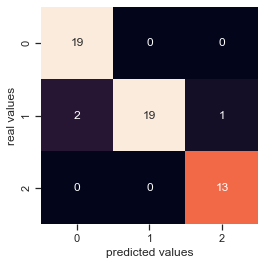

In [283]:
mat_conf = confusion_matrix(target, result)
sns.heatmap(mat_conf, square=True, annot=True, cbar=False)
plt.xlabel('predicted values')
plt.ylabel('real values');

On est sur une bonne prédiction, pour peu de valeurs (~50-70) par classes. Donc 'seulement' 20 valeurs par classes à prédire.

## RandomForest

In [284]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
clf2 = RandomForestClassifier(max_depth=10, random_state=0)
clf2.fit(data_train, target_train)
result = clf2.predict(data_test)
target = target_test

In [286]:
accuracy_score(result, target_test)

0.9814814814814815

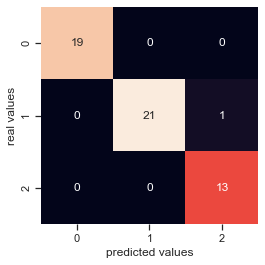

In [287]:
mat_conf = confusion_matrix(target, result)
sns.heatmap(mat_conf, square=True, annot=True, cbar=False)
plt.xlabel('predicted values')
plt.ylabel('real values');

Cette fois on a une seule erreur ! Toujours la classe 2 qui est mal interprétée.

## Kmean

In [288]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier()

In [289]:
from ipywidgets import interact
@interact(k=(0,30))
def k_change(k=5):
    clf3 = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf3.fit(data_train, target_train)
    result = clf3.predict(data_test)
    target = target_test
    print('Résultat pour',k,'=',accuracy_score(result, target))
    mat_conf = confusion_matrix(target, result)
    sns.heatmap(mat_conf, square=True, annot=True, cbar=False)
    plt.xlabel('predicted values')
    plt.ylabel('real values')

interactive(children=(IntSlider(value=5, description='k', max=30), Output()), _dom_classes=('widget-interact',…

On peut ici faire varier les k plus proches voisins que l'on choisi. On remarque que les erreurs sont plus grandes.

## Résolution par apprentisage validation en utilisant les composantes de l'ACP

In [313]:
nom_col = []
for i in range(1,14):
    nom_col.append('C'+str(i))
nom_col

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13']

In [314]:
df2 = pd.DataFrame(data=coord, index=range(178), columns=nom_col)
df2

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893,-0.152146,-0.101996,0.405585,-0.379433,0.145155
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934,-0.457016,1.016563,-0.442433,0.141230,-0.271778
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979,0.123370,0.735600,0.293555,0.379663,-0.110164
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578,0.606589,0.174107,-0.508933,-0.635249,0.142084
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580,0.230489,0.179420,0.012478,0.550327,-0.042455


In [315]:
target = df[liste_df[0]]

In [316]:
from sklearn.model_selection import train_test_split
# On coupe la data en 70% et 30%
data_test2 = train_test_split(df2, target
                                 , random_state=0
                                 , train_size=0.70)
#data_test est une liste de 4 DF :
data_train2, data_test2, target_train2, target_test2 = data_test2

## Naive Bayes

In [321]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(data_train2, target_train2)
result2 = clf.predict(data_test2)
target2 = target_test2

In [322]:
result2

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2,
       2, 1, 3, 2, 3, 1, 3, 3, 1, 3], dtype=int64)

In [323]:
nb_error2 = 0
for i in (result2 - target2):
    if i !=0:
        nb_error2 += 1
print("Nombre de valeurs fausses : "+str(nb_error2))
print("Pourcentage de valeurs justes : "+str((len(result2)-nb_error2)*100/len(result2)))

Nombre de valeurs fausses : 0
Pourcentage de valeurs justes : 100.0


C'est bien mieux non ?

Text(89.18, 0.5, 'real values')

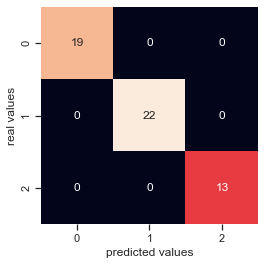

In [324]:
mat_conf2 = confusion_matrix(target2, result2)
sns.heatmap(mat_conf2, square=True, annot=True, cbar=False)
plt.xlabel('predicted values')
plt.ylabel('real values')

Pour cet exemple, on voit que toutes les prédictions sont bonnes avec toutes les composantes, et si on essayait à 3 composantes ?

In [312]:
df3 = df2[list(df2)[0:3]]
df3

,C1,C2,C3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
5,3.050254,-2.122401,-0.629396
6,2.449090,-1.174850,-0.977095
7,2.059437,-1.608963,0.146282
8,2.510874,-0.918071,-1.770969
9,2.753628,-0.789438,-0.984247


In [326]:
target = df[liste_df[0]]

In [327]:
from sklearn.model_selection import train_test_split
# On coupe la data en 70% et 30%
data_test3 = train_test_split(df3, target
                                 , random_state=0
                                 , train_size=0.70)
#data_test est une liste de 4 DF :
data_train3, data_test3, target_train3, target_test3 = data_test3

In [328]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(data_train3, target_train3)
result3 = clf.predict(data_test3)
target3 = target_test3

In [329]:
nb_error3 = 0
for i in (result3 - target3):
    if i !=0:
        nb_error3 += 1
print("Nombre de valeurs fausses : "+str(nb_error3))
print("Pourcentage de valeurs justes : "+str((len(result3)-nb_error3)*100/len(result3)))

Nombre de valeurs fausses : 0
Pourcentage de valeurs justes : 100.0


Text(89.18, 0.5, 'real values')

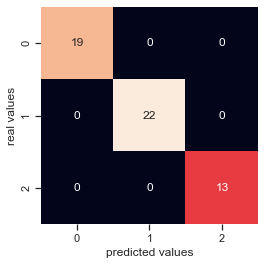

In [330]:
mat_conf3 = confusion_matrix(target3, result3)
sns.heatmap(mat_conf3, square=True, annot=True, cbar=False)
plt.xlabel('predicted values')
plt.ylabel('real values')

Même pas besoin de prendre plus de composantes ! Les 3 premieres donnent les mêmes résultats !

## RandomForest

In [332]:
clf3 = RandomForestClassifier(max_depth=10, random_state=0)
clf3.fit(data_train3, target_train3)
result3 = clf2.predict(data_test3)
target3 = target_test3

In [334]:
accuracy_score(result3, target_test3)

1.0

Text(89.18, 0.5, 'real values')

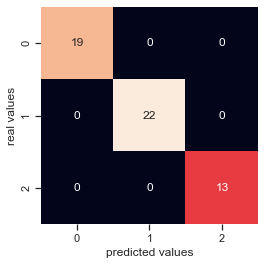

In [335]:
mat_conf3 = confusion_matrix(target3, result3)
sns.heatmap(mat_conf3, square=True, annot=True, cbar=False)
plt.xlabel('predicted values')
plt.ylabel('real values')

toujours parfait !

# Kmean

In [336]:
from sklearn import neighbors

clf4 = neighbors.KNeighborsClassifier()

In [337]:
from ipywidgets import interact
@interact(k=(0,30))
def k_change(k=5):
    clf4 = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf4.fit(data_train3, target_train3)
    result3 = clf4.predict(data_test3)
    target3 = target_test3
    print('Résultat pour',k,'=',accuracy_score(result3, target3))
    mat_conf3 = confusion_matrix(target3, result3)
    sns.heatmap(mat_conf3, square=True, annot=True, cbar=False)
    plt.xlabel('predicted values')
    plt.ylabel('real values')

interactive(children=(IntSlider(value=5, description='k', max=30), Output()), _dom_classes=('widget-interact',…

On prendra ici une valeur pour k comprise entre 5 et 8!

On termine ici ce sujet.
Choses importantes à retenir : les acp (faciles d'accès sur python) ont un réél interet sur les prédictions nottament dans ce cas de classification.